Introduction
Dataset Description
The No_show_appointments dataset is a collection of 100k medical appointment in Brazil with No_show as the target variable. The purpose of this analysis is to discovers trend amongst patients that showed up for their appointments and those that didn't show up and to possibly predict who is likely to show up for a medical appointment and who wouldn't. The dependent variable is No_show and other observations in the dataset include:

* Scheduled date - the date the patient set up an appointment
* Age - Age of patient
* Neighbourhood - Location of hospital
* Hypertension/Alcoholism/Diabetes/Handcap - Different categories of diagnosis
* Sms_received - If a patient received an sms notification or not
* Scholarship - If a patient is a recipient of the Brasilian scholarship or not


##### Question(s) for Analysis
Some of the questions this analysis hopes to answer include:

1. What factors influence showing up or turning down an appointment - This the major question in this analysis and it will be answered under the following headings:
 * How can patients be encouraged to to keep their appointments - for this sms and scholarship will be 
considered
 * Age group that receive more scholarships
 * How the different diagnosed patients respond to different diagnosis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import datetime

In [3]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv", parse_dates =['ScheduledDay', 
                                                                           'AppointmentDay'])
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


From inspecting the first five rows, the schedule date and Appointment date seems to have the same
dates.

In [4]:
df.shape #dataset has 110527 patients and 14 varibales

(110527, 14)

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

Data types are correct and there appears to be no missing values

In [6]:
df.isna().sum() #confirming the absence of missing values
#there are no missing values

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
df.drop(['PatientId', 'AppointmentID'], axis = 1,inplace = True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,110527.0,37.088874,23.110205,-1.0,18.0,37.0,55.0,115.0
Scholarship,110527.0,0.098266,0.297675,0.0,0.0,0.0,0.0,1.0
Hipertension,110527.0,0.197246,0.397921,0.0,0.0,0.0,0.0,1.0
Diabetes,110527.0,0.071865,0.258265,0.0,0.0,0.0,0.0,1.0
Alcoholism,110527.0,0.030400,0.171686,0.0,0.0,0.0,0.0,1.0
Handcap,110527.0,0.022248,0.161543,0.0,0.0,0.0,0.0,4.0
SMS_received,110527.0,0.321026,0.466873,0.0,0.0,0.0,1.0,1.0


The age column has a minimum value of -1.0 which is impossible hence it will be treated as a null value and the oldest patient is 115 years old. The patients have more person of around 30 and 40
years of age.

Many of the patients are not recipients of the scholarship as the median (50%) is zero

Moe than half patients are diagnosed with Hipertension samething goes for diabetes, alcoholism, 
handcap, and hypertensionas their median(50%) is 0.

Most patients do not receive SMS

In [9]:
df['Age'].replace(-1, np.nan, inplace = True) #replace any age recorded as -1 with missing value
df['Age'].isnull().sum() #there is only one patient recorded with age -1

1

In [10]:
df['Age'].fillna(df['Age'].mean(), inplace = True) #Replace missing value with mean

df['Age'].isnull().sum() #confirming if missining value have being replaced

0

#### Exploratory Data Anaysis

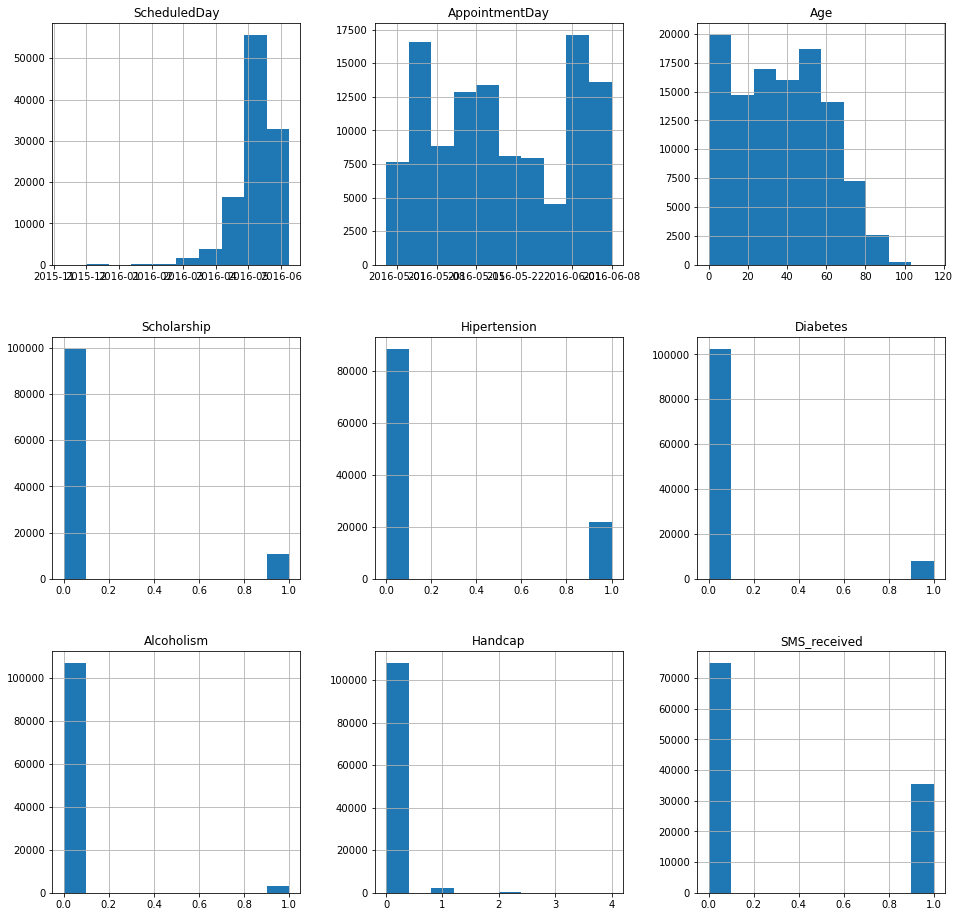

In [11]:
df.hist(figsize = (16, 16));

The histogram shows that there is no even distribution in the dataset. 

In [12]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

In [13]:
df['Year'] = pd.DatetimeIndex(df['AppointmentDay']).year
df['Month'] = pd.DatetimeIndex(df['AppointmentDay']).month

In [14]:
print(df['Year'].head())
print(df['Month'].head())

0    2016
1    2016
2    2016
3    2016
4    2016
Name: Year, dtype: int64
0    4
1    4
2    4
3    4
4    4
Name: Month, dtype: int64


In [15]:
df['Year'].value_counts()

2016    110527
Name: Year, dtype: int64

In [16]:
df['Month'].value_counts()

5    80841
6    26451
4     3235
Name: Month, dtype: int64

There are three months that appointments were made with the fifth month having the highest number of appointments and the fourth with the lowest number of appointments.

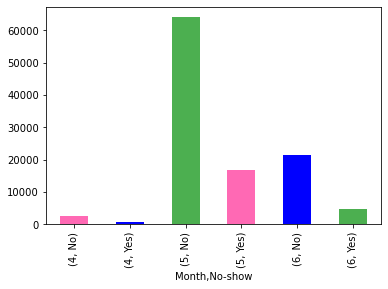

In [17]:
mycolors = ["hotpink", "b", "#4CAF50"]

df.groupby(['Month'])['No-show'].value_counts().plot(kind = 'bar', color = mycolors);

The fifth month of the year has the highest number of person who kept their appointments than other months of the year followed by the sixth month with the fourth month as the least.

In [18]:
df.Age

0         62.0
1         56.0
2         62.0
3          8.0
4         56.0
          ... 
110522    56.0
110523    51.0
110524    21.0
110525    38.0
110526    54.0
Name: Age, Length: 110527, dtype: float64

In [19]:
df['No-show']

0         No
1         No
2         No
3         No
4         No
          ..
110522    No
110523    No
110524    No
110525    No
110526    No
Name: No-show, Length: 110527, dtype: object

In [20]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Year,Month
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No,2016,4
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No,2016,4
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,0,No,2016,4
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016,4
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No,2016,4


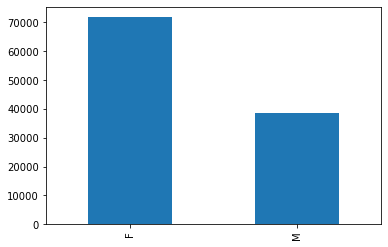

In [21]:
df.Gender.value_counts().plot(kind = 'bar'); #there are females than males

Gender  No-show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No-show, dtype: int64


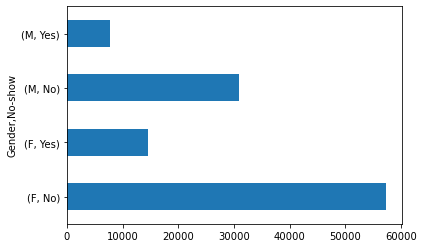

In [22]:
#lets check medical appointment response by gender

print(df.groupby('Gender')['No-show'].value_counts())

df.groupby('Gender')['No-show'].value_counts().plot(kind = 'barh')
plt.show();

Since there are more females than there are males, there more females who don't show up than males

In [23]:
df['Age_binned'] = pd.cut(df['Age'], 5, labels = ['Babies', 'Young Children', 
                                                'Young Adults', 'Adults', 'Aged'])  

df['Age_binned'].value_counts()

Babies            36025
Young Children    33021
Young Adults      32184
Adults             9141
Aged                156
Name: Age_binned, dtype: int64

In [24]:
df.groupby(['Age_binned'])['No-show'].value_counts()

Age_binned      No-show
Babies          No         27880
                Yes         8145
Young Children  No         25701
                Yes         7320
Young Adults    No         26782
                Yes         5402
Adults          No          7718
                Yes         1423
Aged            No           127
                Yes           29
Name: No-show, dtype: int64

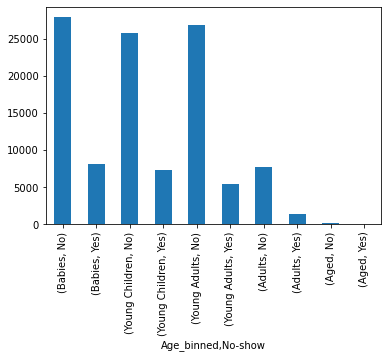

In [25]:
df.groupby(['Age_binned'])['No-show'].value_counts().plot(kind = 'bar');

There are more babies and the least is the Age the least observation.
Amongst the different age groups, Babies has the highest number of no show up, this could be due to the fact that there are more babies than other age groups, and aged has the least no show up.
A general trend in the dataset is that, there are patients who keep appointments than those who do not

The mean age of patients that show up (No) is higher than than those that don't show (Yes)
this means more patients turn up than those that don't turn up.
However, the difference isn't much as they are within the same range 

In [27]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show', 'Year', 'Month', 'Age_binned'],
      dtype='object')

In [28]:
df['SMS_received'].value_counts()
#There are more persons who didnt receive sms(0) than those who did(1)

0    75045
1    35482
Name: SMS_received, dtype: int64

SMS_received  No-show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
Name: No-show, dtype: int64


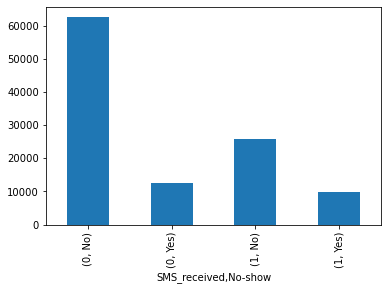

In [30]:
print(df.groupby(['SMS_received'])['No-show'].value_counts())

df.groupby(['SMS_received'])['No-show'].value_counts().plot(kind = 'bar')
plt.show();

The patients that receive sms and keep their appointments are more patients who don't receive SMS and don't keep their appointments. Again, patients that don't receive SMS and don't show up are more than patients that receive SMS and don't show

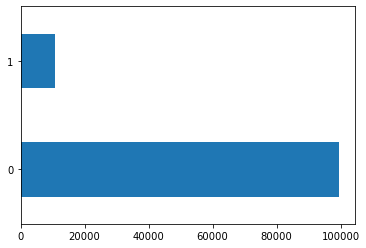

In [31]:
df.Scholarship.value_counts().plot(kind = 'barh');

There are more non-recipients(0) of scholarship than there are recipients(1) of the Brasilian scholarship.
This could be due to the fact that a great number of the population are babies.

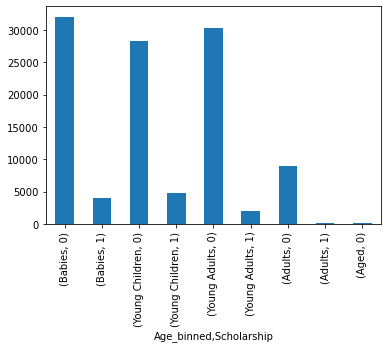

In [32]:
df.groupby(['Age_binned'])['Scholarship'].value_counts().plot(kind = 'bar');

In the age group, there are none recipients of the scholarship than those that did receive the 
scholarship even amongst the age group that of school age (young children and young adults).

In [33]:
df.groupby(['Scholarship'])['No-show'].value_counts()

Scholarship  No-show
0            No         79925
             Yes        19741
1            No          8283
             Yes         2578
Name: No-show, dtype: int64

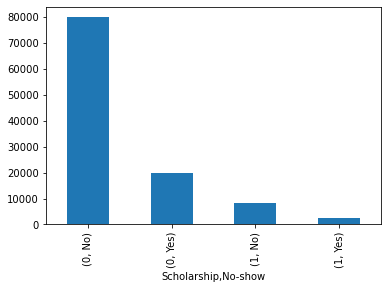

In [34]:
df.groupby(['Scholarship'])['No-show'].value_counts().plot(kind = 'bar');

Since there are more none scholarship recipients, that also reflects in their response to medical appointments. With those that received scholarship they are more positive response to medical appointment than none recipients of scholarship.
Patients that receive scholarship and don't show up are more than are scholars and don't keep appointments

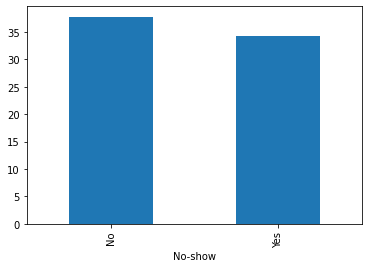

In [35]:
df.groupby('No-show')['Age'].mean().plot(kind= 'bar');

#df.groupby('Sex')['Pclass'].value_counts()
#df.query('Sex == "female"')['Fare'].median(), df.query('Sex == "male"')['Fare'].median()

#df.groupby(['Pclass', 'Sex']).Survived.mean().plot(kind='bar');

In [36]:
df_cat = df[['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']]
df_cat.head()

,Hipertension,Diabetes,Alcoholism,Handcap
0,1,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,1,1,0,0


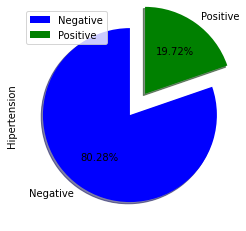

In [37]:
color = ['Blue', 'Green']
exp = [0, 0.3]
lab = ['Negative', 'Positive']
df['Hipertension'].value_counts().plot(kind = 'pie', colors = color,  
startangle=90, explode = exp, shadow = True, labels = lab, autopct='%1.2f%%')
plt.legend()
plt.show();

80.28% who tested negative to hypertension and 19.72% tested positive

0    88726
1    21801
Name: Hipertension, dtype: int64


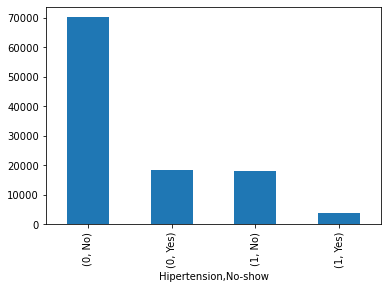

In [38]:
print(df['Hipertension'].value_counts())

df.groupby(['Hipertension'])['No-show'].value_counts().plot(kind = 'bar');

The value counts reveals that they are less patients diagnosed with hypertension than there are patients with hypertension with 1 being diagnosed with hypertension and 0 meaning not diagnosed with hypertension
With keeping up with appointments, those that are diagnosed with hypertension keep more appointments than those diagnosed with and don't keep appointments; And patients without hypertension keep more appointments on the whole. This could be probably due to they are more in number

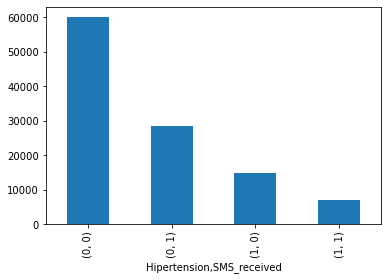

In [39]:
df.groupby(['Hipertension'])['SMS_received'].value_counts().plot(kind = 'bar');

There are persons that don't have hypertension than those that do

'Diabetes', 'Alcoholism', 'Handcap']

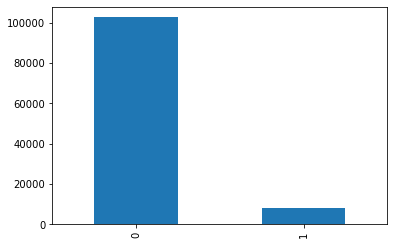

In [47]:
df['Diabetes'].value_counts().plot(kind = 'bar');

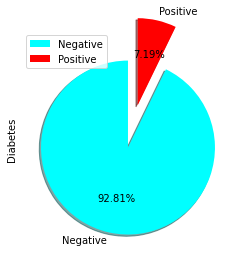

In [41]:
color = ['Cyan', 'Red']
exp = [0.1, 0.4]
lab = ['Negative', 'Positive']
df['Diabetes'].value_counts().plot(kind = 'pie', colors = color,  
startangle = 90, explode = exp, shadow = True, labels = lab, autopct='%1.2f%%')
plt.legend()
plt.show();

The chart reveals that 92.81% are not diagnosed with diabetes and 7.19% tested positive to diabetes

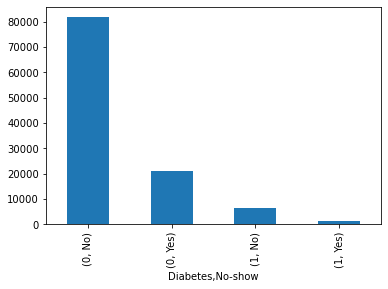

In [48]:
df.groupby(['Diabetes'])['No-show'].value_counts().plot(kind = 'bar');

There are more patients without diabetes than there are with diabetes.
Patients diagnosed with diabetics(1) have the have higher turn rate than those without diabetes and don't turn.
Diabetic patients from the charts keep their appointments more non-diabetic patient

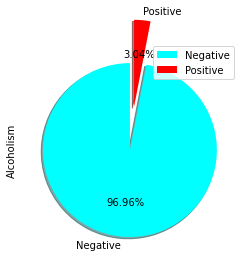

In [43]:
color = ['Cyan', 'Red']
exp = [0, 0.5]
lab = ['Negative', 'Positive']
df['Alcoholism'].value_counts().plot(kind = 'pie', colors = color,  
startangle=90, explode = exp, shadow = True, labels = lab, autopct='%1.2f%%')
plt.legend()
plt.show();

Patients who are non-alcoholic are more than patients who are alcoholic

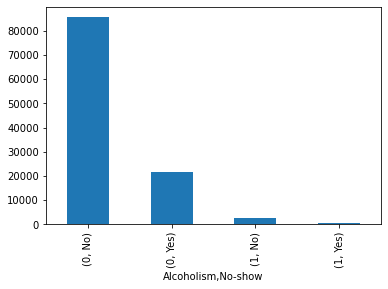

In [55]:
df.groupby(['Alcoholism'])['No-show'].value_counts().plot(kind = 'bar');

More of the patients are non-alcoholics with those that are alcoholics having the least number of patients who don't keep appointments

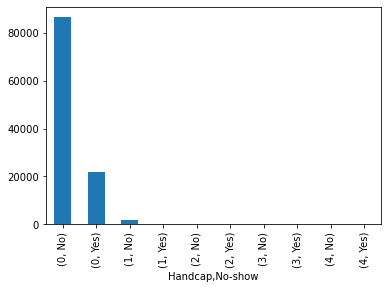

In [44]:
df.groupby(['Handcap'])['No-show'].value_counts().plot(kind = 'bar');

In [45]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

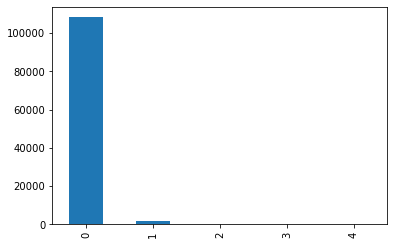

In [46]:

df['Handcap'].value_counts().plot(kind = 'bar');

### Conclusions:
From the above Exploratory Data Analysis, the following conclusions can be drawn:
 * Patients can be encouraged to keep their appointments by sending them SMS, since those that received SMS have greater turn out than those who didn't receive didn't SMS
 * With an increase scholarship there will likely be an increase in number of patients who keep their appointments as a grater number who don't keep appointments are not receipts of the Brasilian scholarship